In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r'/Users/jackthefob/Downloads/housing.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
lreg = LinearRegression();
X    = df.iloc[:, :-1]
y    = df['PRICE']
lreg.fit(X,y)
df['PREDICTION'] = lreg.predict(X)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524


In [8]:
df['ERROR'] = df['PRICE'] - df['PREDICTION']

In [9]:
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [10]:
lreg.intercept_

36.459488385090005

In [15]:
coef = pd.DataFrame({
    'Variable': X.columns,
    'Weight'  : lreg.coef_
}).sort_values(by='Weight', ascending=False)
coef

,Variable,Weight
5,RM,3.809865
3,CHAS,2.686734
8,RAD,0.306049
1,ZN,0.046420
2,INDUS,0.020559
11,B,0.009312
6,AGE,0.000692
9,TAX,-0.012335
0,CRIM,-0.108011
12,LSTAT,-0.524758


In [16]:
lreg.score(X, y)

0.7406426641094094

In [17]:
lreg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [18]:
lreg.set_params(n_jobs=-1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [22]:
SSred = np.sum((df.PREDICTION - df.PRICE)**2)

In [23]:
SStot = np.sum((y.mean() - df.PRICE)**2)

In [24]:
1 - (SSred/SStot)

0.7406426641094093

In [26]:
MSE = np.mean((df.PREDICTION - df.PRICE)**2)

In [27]:
MSE

21.894831181729202

In [30]:
rmse = np.mean(df.ERROR**2)

In [31]:
rmse

21.894831181729202

In [32]:
X.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [33]:
X.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

In [37]:
X_std = (X - X.mean()) / X.std()

In [48]:
X_std.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [38]:
X_std.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.326673e-17,3.466704e-16,-3.016965e-15,3.999875e-16,3.167427e-15,-1.258809e-14,-1.158274e-15,7.308603e-16,-1.068535e-15,6.534079e-16,-1.084420e-14,8.117354e-15,-6.494585e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


In [43]:
lreg.fit(X_std, y)
df['PREDICTION_STD'] = lreg.predict(X_std)

In [45]:
lreg.score(X_std, y)

0.7406426641094095

In [47]:
coef_std = pd.DataFrame({
    'Variable' : X_std.columns,
    'Weight'   : lreg.coef_
}).sort_values(by='Weight', ascending=False)
coef_std

,Variable,Weight
5,RM,2.676877
8,RAD,2.664852
1,ZN,1.082639
11,B,0.850109
3,CHAS,0.682414
2,INDUS,0.141039
6,AGE,0.019485
0,CRIM,-0.929065
4,NOX,-2.058754
10,PTRATIO,-2.062646


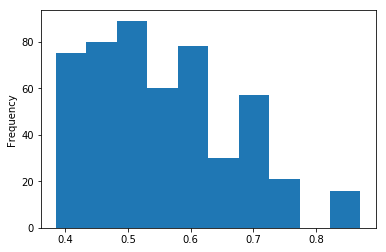

In [49]:
%matplotlib inline
df['NOX'].plot.hist()

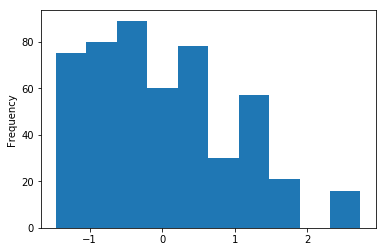

In [50]:
X_std['NOX'].plot.hist()

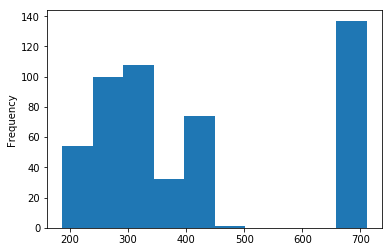

In [51]:
df['TAX'].plot.hist()

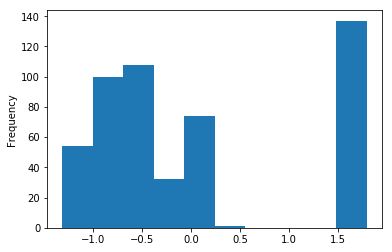

In [52]:
X_std['TAX'].plot.hist()

# Pay attention on random_state, see ?train_test_split for details

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=4)

In [55]:
X_train.shape

(404, 13)

In [56]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [57]:
lreg.score(X_train, y_train)

0.7415244219726307

In [58]:
lreg.score(X_test, y_test)

0.7263451459702508

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = lreg, X = X_train, y = y_train, cv = 10)

In [63]:
scores

array([0.7436186 , 0.6402051 , 0.62185032, 0.80365414, 0.72356816,
       0.77424977, 0.7035064 , 0.82898865, 0.5443582 , 0.67406383])

In [64]:
np.mean(scores)

0.7058063175527348

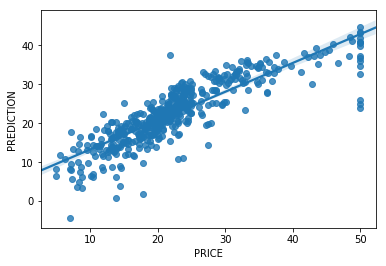

In [65]:
import seaborn as sns
sns.regplot(x = 'PRICE', y = 'PREDICTION', data = df)

In [67]:
?sns.regplot

In [72]:
from sklearn.linear_model import Ridge
rreg = Ridge()

In [74]:
rreg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [76]:
import matplotlib.pyplot as plt

In [82]:
validation_scores = []
alphas = np.logspace(-4, 4, 9)
for kitten in alphas:
    rreg.set_params(alpha = kitten)
    scores = cross_val_score(estimator = rreg, X = X_train, y = y_train, cv = 10)
    validation_scores.append((np.mean(scores), kitten))

In [80]:
alphas

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

In [83]:
validation_scores

[(0.705806361432838, 0.0001),
 (0.7058067563196436, 0.001),
 (0.7058107018111908, 0.01),
 (0.7058498212432979, 0.1),
 (0.7062095058778417, 1.0),
 (0.7078940251391825, 10.0),
 (0.6953921702130058, 100.0),
 (0.5161463028372284, 1000.0),
 (0.12503334509669406, 10000.0)]

In [84]:
max(validation_scores)

(0.7078940251391825, 10.0)

In [85]:
rreg.set_params(alpha=10)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [86]:
rreg.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
rreg.score(X_test, y_test)

0.7226573719397063

In [89]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()

In [90]:
lasso_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [91]:
lasso_scores = []
lasso_alphas = np.logspace(-4, 4, 9)
for kitten in lasso_alphas:
    lasso_reg.set_params(alpha = kitten)
    scores_lasso = cross_val_score(estimator = lasso_reg, X = X_train, y = y_train, cv = 10)
    lasso_scores.append((np.mean(scores_lasso), kitten))

In [92]:
lasso_scores

[(0.7058102692197739, 0.0001),
 (0.7058449110861351, 0.001),
 (0.7061142254735119, 0.01),
 (0.6994323873927507, 0.1),
 (0.6413698446420188, 1.0),
 (-0.051590329090446294, 10.0),
 (-0.051590329090446294, 100.0),
 (-0.051590329090446294, 1000.0),
 (-0.051590329090446294, 10000.0)]

In [93]:
max(lasso_scores)

(0.7061142254735119, 0.01)

In [94]:
lasso_reg.set_params(alpha=0.1)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
lasso_reg.score(X_test, y_test)

0.722058849159044

In [97]:
lasso_reg.coef_

array([-0.66930452,  0.69486597, -0.13051964,  0.76963196, -1.50781438,
        2.83044422, -0.07602431, -2.46296628,  1.08209583, -0.99893931,
       -1.8455944 ,  0.67705448, -3.3511899 ])

In [98]:
lasso_reg.set_params(alpha=0.01).fit(X_train, y_train).coef_

array([-0.96519028,  1.0550249 , -0.        ,  0.81844782, -1.88062031,
        2.73720292, -0.28351012, -3.17411898,  2.38952374, -2.10548253,
       -1.94722335,  0.79033734, -3.2749332 ])

# https://en.wikipedia.org/wiki/Sigmoid_function

In [99]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [100]:
sigmoid(4)

0.9820137900379085

In [101]:
sigmoid(0)

0.5

In [102]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [103]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [105]:
X = X_std.loc[:, X_std.columns != 'CHAS']

In [106]:
X['PRICE'] = (df['PRICE'] - df['PRICE'].mean()) / (df['PRICE'].std())

In [111]:
y = df['CHAS']

In [108]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.419367,0.284548,-1.286636,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [112]:
logreg.fit(X, y)

/Users/jackthefob/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
logreg.coef_

array([[-0.79349917, -0.05715328,  0.47629122,  0.30631293, -0.04810405,
         0.1925896 , -0.04507395,  0.87357239, -0.84244688, -0.22240545,
         0.21774889,  0.07885432,  0.57287776]])

In [114]:
logreg.intercept_

array([-2.91470246])

In [115]:
logreg.predict_proba(X)

array([[0.95985802, 0.04014198],
       [0.94728722, 0.05271278],
       [0.90994657, 0.09005343],
       ...,
       [0.93426874, 0.06573126],
       [0.94158028, 0.05841972],
       [0.96732531, 0.03267469]])

In [116]:
del df['CHAS']

In [117]:
lr_df = pd.DataFrame({
    'CHAS'       : y,
    'ODDS'       : logreg.predict_proba(X)[:, 1],
    'PREDICTION' : logreg.predict(X)
})

In [118]:
lr_df

,CHAS,ODDS,PREDICTION
0,0,0.040142,0
1,0,0.052713,0
2,0,0.090053,0
3,0,0.058512,0
4,0,0.073910,0
5,0,0.051186,0
6,0,0.079034,0
7,0,0.125726,0
8,0,0.079420,0
9,0,0.071004,0


In [119]:
lr_df['OUTPUT'] = X @ logreg.coef_.T + logreg.intercept_

In [120]:
lr_df.head()

,CHAS,ODDS,PREDICTION,OUTPUT
0,0,0.040142,0,-3.174363
1,0,0.052713,0,-2.888744
2,0,0.090053,0,-2.312983
3,0,0.058512,0,-2.778221
4,0,0.073910,0,-2.528120


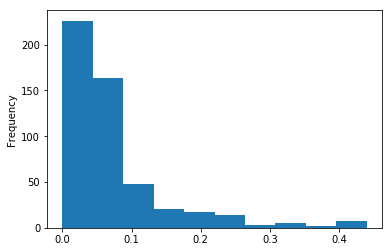

In [121]:
lr_df['ODDS'].plot.hist()

In [122]:
lr_df['ODDS'].max()

0.44012478281359974

In [123]:
X_std.groupby('CHAS')['LSTAT'].mean()

CHAS
-0.272329    0.014687
 3.664771   -0.197639
Name: LSTAT, dtype: float64